# Homework

## Problem 1

Let $f(x) = 2\sin x - \cos{2x}$. Write a function `beauty_derivative_plot` that takes a point $x$ and plots the function $f(x)$ and its derivative $f'(x)$ in the range $x \in [-2\pi, 2\pi]$. The function should also plot the tangent line to the function at the point $x$.

Example of output for $x = -3, -2, 1.7$:

```python
beauty_derivative_plot(-3)
```
<img src="https://i.ibb.co/W4pyPfTX/tangent-line-3-0.png" width="600"/>

```python
beauty_derivative_plot(-2)
```
<img src="https://i.ibb.co/F4zDq8m0/tangent-line-2-0.png" width="600"/>

```python
beauty_derivative_plot(1.7)
```
<img src="https://i.ibb.co/TBmLXg2h/tangent-line-1-7.png" width="600"/>

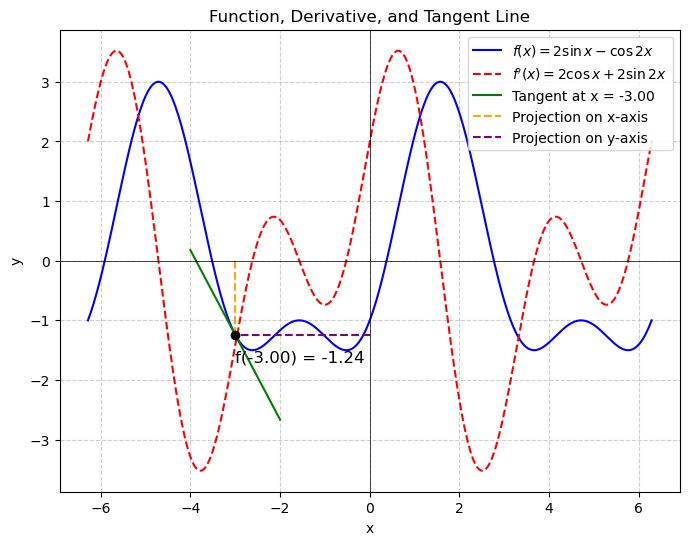

In [11]:
import numpy as np
import matplotlib.pyplot as plt
#Function
def f(x):
    return 2 * np.sin(x) - np.cos(2 * x)
#Derivative
def df(x):
    return 2 * np.cos(x) + 2 * np.sin(2 * x)
#Tangent line
def tangent_line(x, x0):
    return f(x0) + df(x0) * (x - x0)
#Main function
def beauty_derivative_plot(x0):
    x = np.linspace(-2 * np.pi, 2 * np.pi, 400)
    y = f(x)
    dy = df(x)
    
    #Plotting function and its derivative
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, 'b', label=r'$f(x) = 2\sin{x} - \cos{2x}$')
    plt.plot(x, dy, 'r--', label=r"$f'(x) = 2\cos{x} + 2\sin{2x}$")

    #Plotting tangent
    x_tangent = np.linspace(x0 - 1, x0 + 1, 100)
    y_tangent = tangent_line(x_tangent, x0)
    plt.plot(x_tangent, y_tangent, 'g', label=f'Tangent at x = {x0:.2f}')
    
    #Horisontal and vertical projections
    plt.plot([x0, x0], [0, f(x0)], color='orange', linestyle='--', label=f'Projection on x-axis')
    plt.plot([0, x0], [f(x0), f(x0)], color='purple', linestyle='--', label=f'Projection on y-axis')
    
    #Marking point
    plt.scatter([x0], [f(x0)], color='black', zorder=3)
    plt.text(x0, f(x0)-0.5, f'f({x0:.2f}) = {f(x0):.2f}', fontsize=12, verticalalignment='bottom')
    
    #Axes
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    
    #Legend and title
    plt.legend()
    plt.title("Function, Derivative, and Tangent Line")
    plt.xlabel("x")
    plt.ylabel("y")
    
    #Grid
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

#Example
beauty_derivative_plot(-3)

## Problem 2

The data in [populations.txt](https://drive.google.com/file/d/1Bq7qVzbZIOd058VobGE6iYjUcMFkbZMt/view?usp=drive_link) describes the populations of hares, lynxes and carrots in northern Canada during 20 years. Do the following exercises **without for-loops**.

- Plot the population size of each species for each year on a single graph. Add legend and axis labels to the plot.

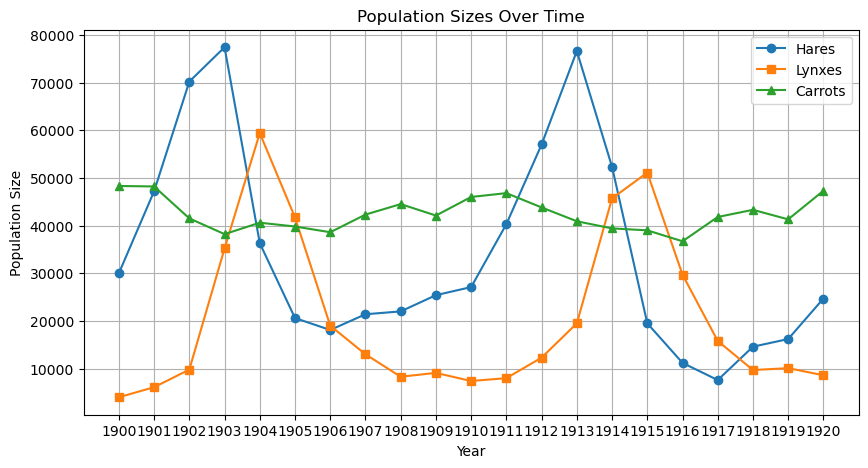

In [18]:
import matplotlib.pyplot as plt

#Reading file
with open("populations.txt", "r") as file:
    lines = file.readlines()

#Extracting data, skipping header
years, hares, lynxes, carrots = [], [], [], []

#Transforming data
data = list(zip(*[map(float, line.split()) for line in lines[1:]]))

#Splitting columns
years, hares, lynxes, carrots = map(list, data)
years = list(map(int, years))  

#Plotting
plt.figure(figsize=(10, 5))
plt.plot(years, hares, label="Hares", marker="o", linestyle="-")
plt.plot(years, lynxes, label="Lynxes", marker="s", linestyle="-")
plt.plot(years, carrots, label="Carrots", marker="^", linestyle="-")

#Axes and legend
plt.xlabel("Year")
plt.ylabel("Population Size")
plt.title("Population Sizes Over Time")
plt.legend()
plt.grid()
#Setting integer years on the X-axis
plt.xticks(years)

plt.show()

- Find which year each species had the largest population. Mark these years in the plot of populations.

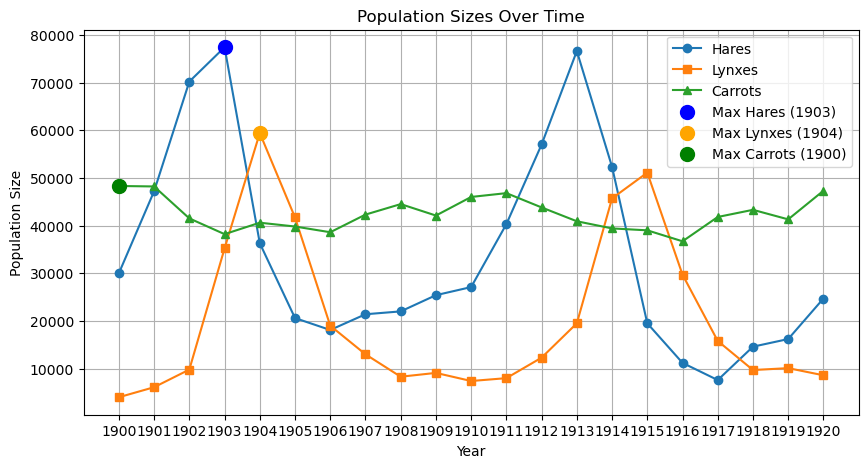

In [19]:
import matplotlib.pyplot as plt

with open("populations.txt", "r") as file:
    lines = file.readlines()

years, hares, lynxes, carrots = [], [], [], []

data = list(zip(*[map(float, line.split()) for line in lines[1:]]))

years, hares, lynxes, carrots = map(list, data)
years = list(map(int, years)) 

#Searching for the age with the biggest population
max_hare_year = years[hares.index(max(hares))]
max_lynx_year = years[lynxes.index(max(lynxes))]
max_carrot_year = years[carrots.index(max(carrots))]

plt.figure(figsize=(10, 5))
plt.plot(years, hares, label="Hares", marker="o", linestyle="-")
plt.plot(years, lynxes, label="Lynxes", marker="s", linestyle="-")
plt.plot(years, carrots, label="Carrots", marker="^", linestyle="-")

#Marking years with the biggest population
plt.scatter(max_hare_year, max(hares), color='blue', s=100, zorder=5, label=f"Max Hares ({max_hare_year})")
plt.scatter(max_lynx_year, max(lynxes), color='orange', s=100, zorder=5, label=f"Max Lynxes ({max_lynx_year})")
plt.scatter(max_carrot_year, max(carrots), color='green', s=100, zorder=5, label=f"Max Carrots ({max_carrot_year})")

plt.xlabel("Year")
plt.ylabel("Population Size")
plt.title("Population Sizes Over Time")
plt.legend()
plt.grid()

plt.xticks(years)  

plt.show()

- Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for each year in the period.

<BarContainer object of 21 artists>

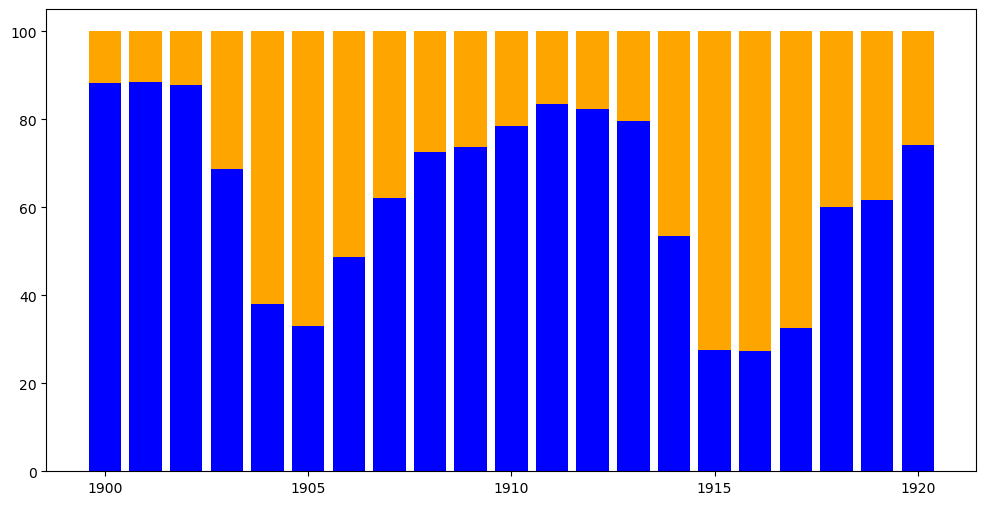

In [7]:
import matplotlib.pyplot as plt

with open("populations.txt", "r") as file:
    lines = file.readlines()

years, hares, lynxes, carrots = [], [], [], []

data = list(zip(*[map(float, line.split()) for line in lines[1:]]))

years, hares, lynxes, carrots = map(list, data)
years = list(map(int, years)) 

#Calculating total population
total_population = [hare + lynx for hare, lynx in zip(hares, lynxes)]

#Percents
hare_percent = [(hare / total) * 100 for hare, total in zip(hares, total_population)]
lynx_percent = [(lynx / total) * 100 for lynx, total in zip(lynxes, total_population)]

#Making stacked bar graph
plt.figure(figsize=(12, 6))
plt.bar(years, hare_percent, label="Hares", color="blue")
plt.bar(years, lynx_percent, bottom=hare_percent, label="Lynxes", color="orange")



- Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Show each histogram in a separate plot. Arrange 3 plots in a row.

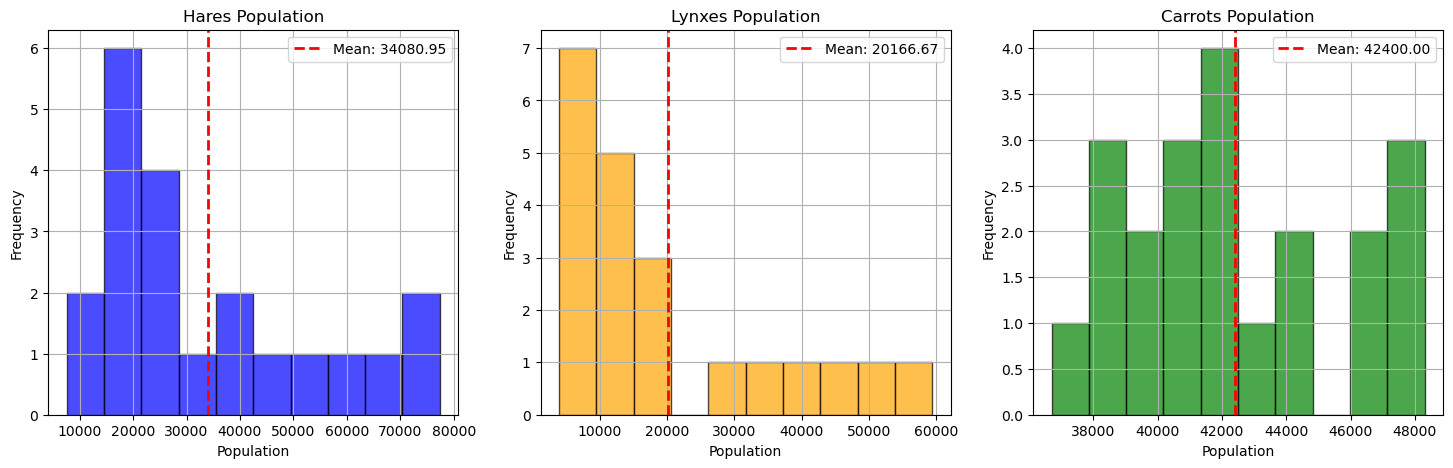

Hares: Mean = 34080.95, Std = 20897.91
Lynxes: Mean = 20166.67, Std = 16254.59
Carrots: Mean = 42400.00, Std = 3322.51


In [24]:
import matplotlib.pyplot as plt

with open("populations.txt", "r") as file:
    lines = file.readlines()

years, hares, lynxes, carrots = [], [], [], []

data = list(zip(*[map(float, line.split()) for line in lines[1:]]))

years, hares, lynxes, carrots = map(list, data)
years = list(map(int, years)) 

#Converting to numpy arrays for easier calculations
hares = np.array(hares)
lynxes = np.array(lynxes)
carrots = np.array(carrots)

#Calculating mean and standard deviation
hare_mean, hare_std = hares.mean(), hares.std()
lynx_mean, lynx_std = lynxes.mean(), lynxes.std()
carrot_mean, carrot_std = carrots.mean(), carrots.std()

#Creating a figure with 3 subplots in a row
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

#Plotting histogram for hares
axes[0].hist(hares, bins=10, color="blue", alpha=0.7, edgecolor="black")
axes[0].axvline(hare_mean, color="red", linestyle="dashed", linewidth=2, label=f"Mean: {hare_mean:.2f}")
axes[0].set_title("Hares Population")
axes[0].set_xlabel("Population")
axes[0].set_ylabel("Frequency")
axes[0].legend()
axes[0].grid(True)

#For lynxes
axes[1].hist(lynxes, bins=10, color="orange", alpha=0.7, edgecolor="black")
axes[1].axvline(lynx_mean, color="red", linestyle="dashed", linewidth=2, label=f"Mean: {lynx_mean:.2f}")
axes[1].set_title("Lynxes Population")
axes[1].set_xlabel("Population")
axes[1].set_ylabel("Frequency")
axes[1].legend()
axes[1].grid(True)

#For carrots
axes[2].hist(carrots, bins=10, color="green", alpha=0.7, edgecolor="black")
axes[2].axvline(carrot_mean, color="red", linestyle="dashed", linewidth=2, label=f"Mean: {carrot_mean:.2f}")
axes[2].set_title("Carrots Population")
axes[2].set_xlabel("Population")
axes[2].set_ylabel("Frequency")
axes[2].legend()
axes[2].grid(True)


plt.show()

#Printing mean and standard deviation
print(f"Hares: Mean = {hare_mean:.2f}, Std = {hare_std:.2f}")
print(f"Lynxes: Mean = {lynx_mean:.2f}, Std = {lynx_std:.2f}")
print(f"Carrots: Mean = {carrot_mean:.2f}, Std = {carrot_std:.2f}")

- Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing the ratio of "H" and "L" values.

Dominant species for each year: ['H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H']


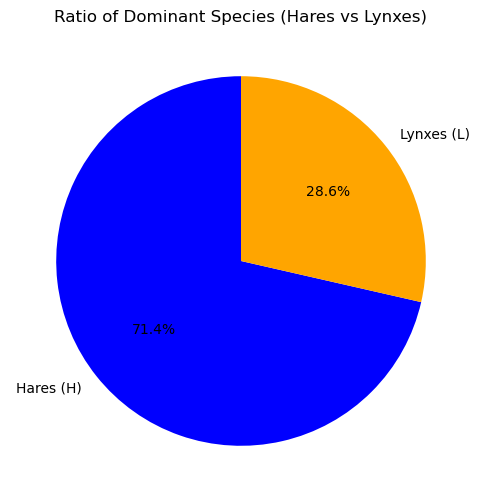

In [59]:
import matplotlib.pyplot as plt

with open("populations.txt", "r") as file:
    lines = file.readlines()

years, hares, lynxes, carrots = [], [], [], []

data = list(zip(*[map(float, line.split()) for line in lines[1:]]))

years, hares, lynxes, carrots = map(list, data)
years = list(map(int, years)) 

#Looking for dominant species by comparing a population
dominant_species = ["H" if hare > lynx else "L" for hare, lynx in zip(hares, lynxes)]

# Выводим результат
print("Dominant species for each year:", dominant_species)

# Подсчитываем количество "H" и "L"
h_count = dominant_species.count("H")
l_count = dominant_species.count("L")

# Построение круговой диаграммы
plt.figure(figsize=(6, 6))
plt.pie(
    [h_count, l_count], 
    labels=["Hares (H)", "Lynxes (L)"], 
    autopct="%1.1f%%", 
    colors=["blue", "orange"], 
    startangle=90
)
plt.title("Ratio of Dominant Species (Hares vs Lynxes)")
plt.show()

- Plot the change in the hare population and in the lynx population for each year. Find the correlation coefficient between the both time series.

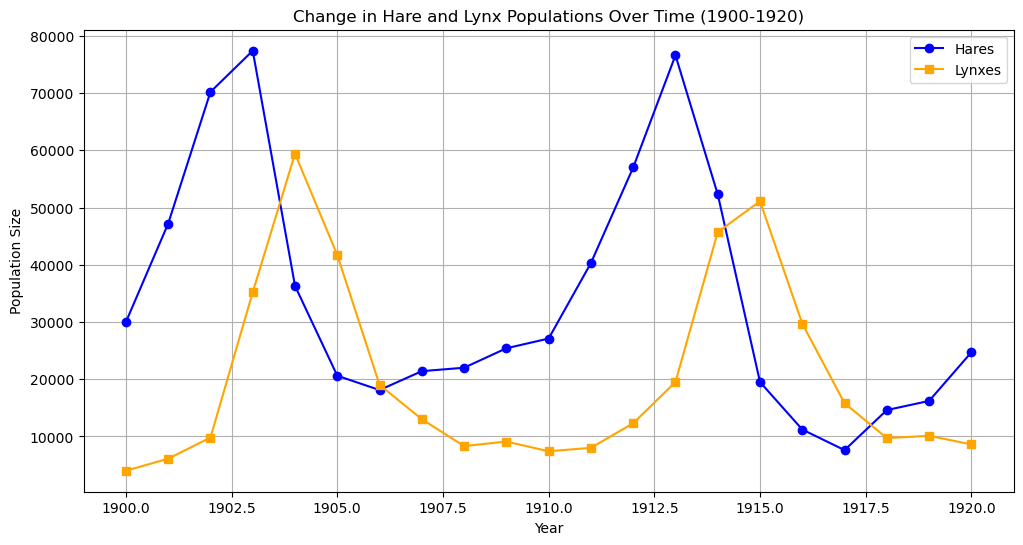

Correlation coefficient between hare and lynx populations: 0.07189206073535571


In [28]:
import matplotlib.pyplot as plt

with open("populations.txt", "r") as file:
    lines = file.readlines()

years, hares, lynxes, carrots = [], [], [], []

data = list(zip(*[map(float, line.split()) for line in lines[1:]]))

years, hares, lynxes, carrots = map(list, data)
years = list(map(int, years)) 

#Plotting population graphs
plt.figure(figsize=(12, 6))
plt.plot(years, hares, label="Hares", marker="o", linestyle="-", color="blue")
plt.plot(years, lynxes, label="Lynxes", marker="s", linestyle="-", color="orange")

#Legend and title
plt.xlabel("Year")
plt.ylabel("Population Size")
plt.title("Change in Hare and Lynx Populations Over Time (1900-1920)")
plt.legend()
plt.grid()

plt.show()

#Calculating correlation
correlation_coefficient = np.corrcoef(hares, lynxes)[0, 1]
print(f"Correlation coefficient between hare and lynx populations: {correlation_coefficient}")

- Using a scatter plot, show the population of hares vs lynxes by year (each point corresponds to a particular year, and the point coordinates correspond to the population of the two species in that year).

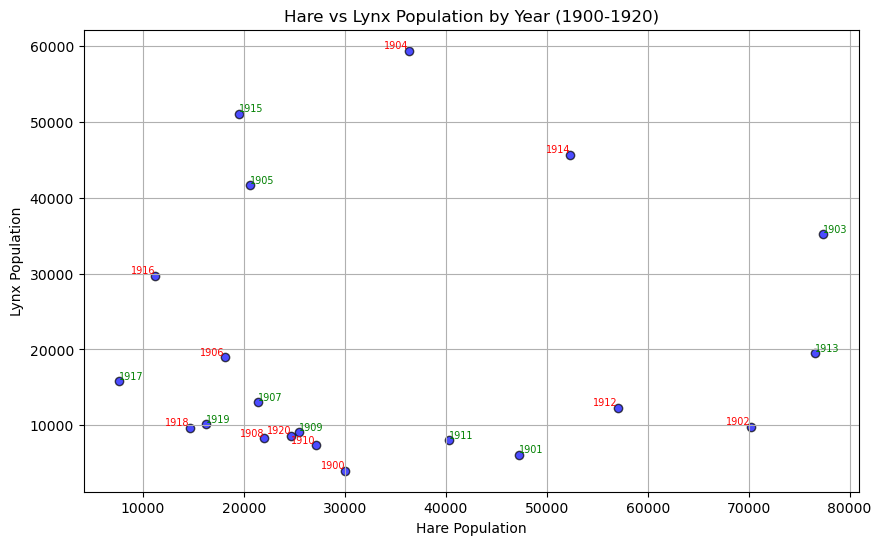

In [57]:
import matplotlib.pyplot as plt
with open("populations.txt", "r") as file:
    lines = file.readlines()

years, hares, lynxes, carrots = [], [], [], []

data = list(zip(*[map(float, line.split()) for line in lines[1:]]))

years, hares, lynxes, carrots = map(list, data)
years = list(map(int, years)) 

#Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(hares, lynxes, color="blue", alpha=0.7, edgecolor="black")

#Annotations of years, different colors and ha to avoid text intersection
for year, hare, lynx in zip(years, hares, lynxes):
    color = "red" if year % 2 == 0 else "green"  
    ha = "left" if year % 2 == 1 else "right"  
    plt.text(hare, lynx, str(year), fontsize=7, ha=ha, va="bottom", color=color)

#Axes and title
plt.xlabel("Hare Population")
plt.ylabel("Lynx Population")
plt.title("Hare vs Lynx Population by Year (1900-1920)")
plt.grid()


plt.show()

- Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value
with the true value and print a ratio of the error to the true value.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


with open("populations.txt", "r") as file:
    lines = file.readlines()


data = list(zip(*[map(float, line.split()) for line in lines[1:]]))
years, hares, lynxes, carrots = map(list, data)
years = list(map(int, years))  # Convert years to integers

#Removing 1920 data for hares
years_train = years[:-1]  
hares_train = hares[:-1] 
true_hare_1920 = hares[-1]  # Saving true value for comparison

#Reshaping for LinearRegression()
X_train = np.array(years_train).reshape(-1, 1)
y_train = np.array(hares_train)

#Training linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

#Predicting the hare population in 1920
estimated_hare_1920 = model.predict([[1920]])[0]

#Calculatimg error ratio
error_ratio = abs(estimated_hare_1920 - true_hare_1920) / true_hare_1920

#Printing results
print(f"Estimated hare population in 1920: {estimated_hare_1920:.2f}")
print(f"True hare population in 1920: {true_hare_1920}")
print(f"Error ratio: {error_ratio:.2%}")


Estimated hare population in 1920: 19775.79
True hare population in 1920: 24700.0
Error ratio: 19.94%
